In [ ]:
# Importing necessary libraries
import pandas as pd
import tkinter as tk
from tkinter import Tk, filedialog

root = Tk()
root.attributes('-topmost', True)
root.withdraw()

# Set up Tkinter to get file path
tk.Tk().withdraw()  # Prevents full GUI from appearing
file_path = filedialog.askopenfilename()  # Open file dialog to select CSV file

# Load the uploaded CSV file
data = pd.read_csv(file_path)

# Load the file again, skipping the first few rows to identify the actual data
data_skip_more = pd.read_csv(file_path, skiprows=15)

# Convert 'Time' column to numeric values and handle missing or erroneous data
data_skip_more['Time'] = pd.to_numeric(data_skip_more['Time'], errors='coerce')

# Drop rows with NaN values in the 'Time' column (in case there were any conversion issues)
data_skip_more = data_skip_more.dropna(subset=['Time'])

# Define the binning interval in minutes (5 minutes)
interval_minutes = 5
interval_seconds = interval_minutes * 60

# Create a new column to represent the time bins (each bin corresponds to 5-minute intervals)
data_skip_more['Time Bin'] = (data_skip_more['Time'] // interval_seconds).astype(int)

# Group by 'Behavior' and 'Time Bin' to calculate the count of each behavior in each time bin
behavior_counts = data_skip_more.groupby(['Behavior', 'Time Bin']).size().reset_index(name='Count')

# Pivot the table to have 'Behavior' types as columns and 'Time Bin' as rows
behavior_pivot = behavior_counts.pivot(index='Time Bin', columns='Behavior', values='Count').fillna(0)

# Resetting the index for better readability
behavior_pivot = behavior_pivot.reset_index()

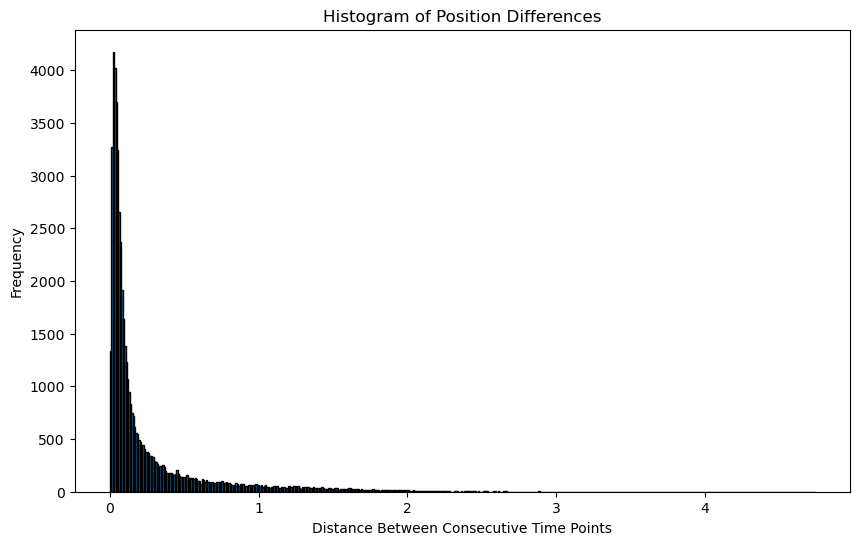

In [19]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import Tk, filedialog

# Set up Tkinter to get file path
root = Tk()
root.attributes('-topmost', True)
root.withdraw()

# Sample data representation
# Assuming the file contains columns: 'x', 'y', 'likelihood'
file_path = filedialog.askopenfilename()

# Load the CSV file
data = pd.read_csv(file_path, header=[1, 2])

# Rename columns for simplicity
data.columns = ['coords','x', 'y', 'likelihood']

# Apply Gaussian filter to smooth the x and y positions to reduce noise
data['x_smooth'] = gaussian_filter1d(data['x'], sigma=5)
data['y_smooth'] = gaussian_filter1d(data['y'], sigma=5)

# Calculate the position differences between consecutive rows
data['x_diff'] = data['x_smooth'].diff()
data['y_diff'] = data['y_smooth'].diff()
data['distance'] = np.sqrt(data['x_diff']**2 + data['y_diff']**2)

# Plotting the histogram of distances
plt.figure(figsize=(10, 6))
plt.hist(data['distance'].dropna(), bins=500, edgecolor='black')
plt.xlabel('Distance Between Consecutive Time Points')
plt.ylabel('Frequency')
plt.title('Histogram of Position Differences')
plt.show()


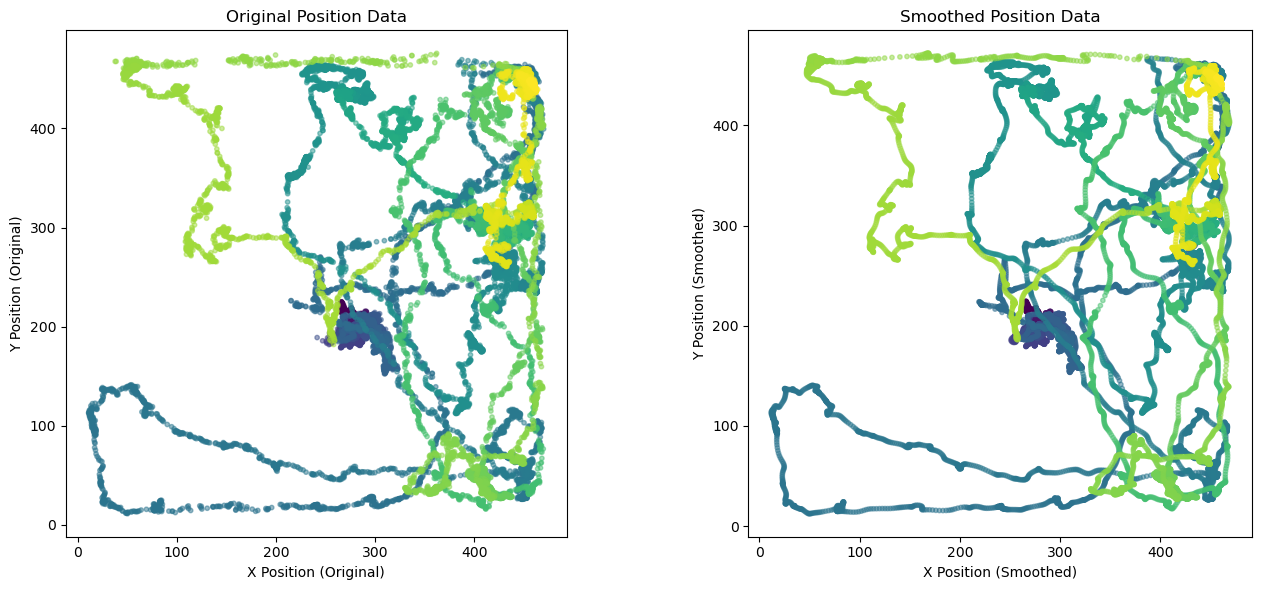

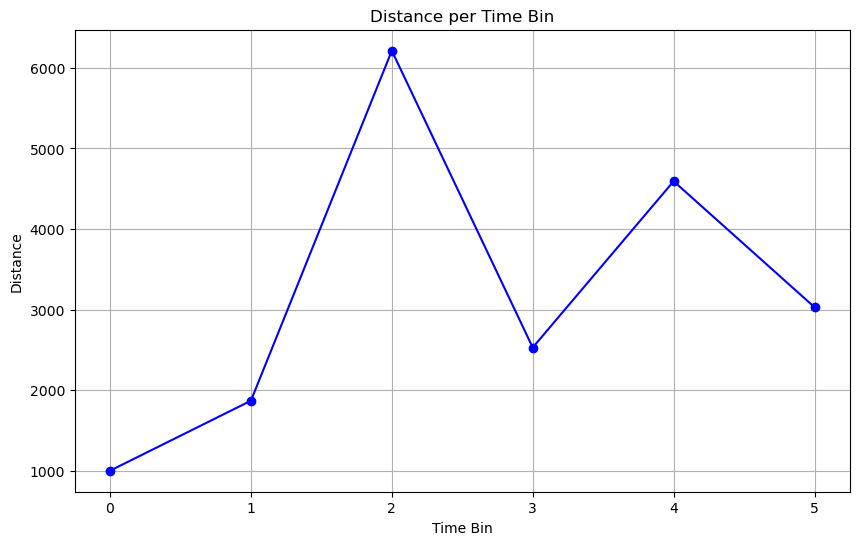

     x_smooth    y_smooth  distance
0  267.846221  221.215173       NaN
1  267.707331  221.124251  0.166004
2  267.457724  221.010849  0.274160
3  267.143312  220.938120  0.322715
4  266.812191  220.905493  0.332725


In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import Tk, filedialog
from scipy.ndimage import gaussian_filter1d
import matplotlib.cm as cm

# Set up Tkinter to get file path
root = Tk()
root.attributes('-topmost', True)
root.withdraw()

# Sample data representation
# Assuming the file contains columns: 'x', 'y', 'likelihood'
file_path = filedialog.askopenfilename()

# Load the CSV file
data = pd.read_csv(file_path, header=[1, 2])

# Rename columns for simplicity
data.columns = ['coords','x', 'y', 'likelihood']

# Apply Gaussian filter to smooth the x and y positions to reduce noise
data['x_smooth'] = gaussian_filter1d(data['x'], sigma=2)
data['y_smooth'] = gaussian_filter1d(data['y'], sigma=2)

# Plotting the original vs smoothed positions in a 2D scatter plot
plt.figure(figsize=(14, 6))

# Colormap to visualize time progression
colors = cm.viridis(np.linspace(0, 1, len(data)))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(data['x'], data['y'], c=colors, s=10, alpha=0.5)
plt.xlabel('X Position (Original)')
plt.ylabel('Y Position (Original)')
plt.title('Original Position Data')
plt.gca().set_aspect('equal', adjustable='box')

# Smoothed data plot
plt.subplot(1, 2, 2)
plt.scatter(data['x_smooth'], data['y_smooth'], c=colors, s=10, alpha=0.5)
plt.xlabel('X Position (Smoothed)')
plt.ylabel('Y Position (Smoothed)')
plt.title('Smoothed Position Data')
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Calculate the position differences between consecutive rows using smoothed data
data['x_diff'] = data['x_smooth'].diff()
data['y_diff'] = data['y_smooth'].diff()
data['distance'] = np.sqrt(data['x_diff']**2 + data['y_diff']**2)

# Binning the distance data by time (assuming equal intervals)
bin_size = 30*60*5  # Define bin size (e.g., 30 frames per bin)
data['time_bin'] = (data.index // bin_size).astype(int)

# Group by 'time_bin' and calculate the mean distance per bin
distance_binned = data.groupby('time_bin')['distance'].sum().reset_index()

# Plotting the binned distance as a line plot
plt.figure(figsize=(10, 6))
plt.plot(distance_binned['time_bin'], distance_binned['distance'], marker='o', linestyle='-', color='b')
plt.xlabel('Time Bin')
plt.ylabel('Distance')
plt.title('Distance per Time Bin')
plt.grid(True)
plt.show()

# Display the first few rows of the smoothed data and distance to verify preprocessing
print(data[['x_smooth', 'y_smooth', 'distance']].head())

In [20]:
data['distance']

0             NaN
1        0.034237
2        0.065073
3        0.089599
4        0.105880
           ...   
53941    0.225903
53942    0.198243
53943    0.159643
53944    0.112071
53945    0.057752
Name: distance, Length: 53946, dtype: float64